In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### &#11088; Visualisierung der Daten

### &#11088; Funktionen für die Visualisierung und Plotting

In [3]:
def Datensatz(CSVdatei):
    data = pd.read_csv(CSVdatei, delimiter= ";")
    return data
    

**Ringe** 

Die Funktion Ringe macht es, dass ein Datensatz eingelesen wird und dann ein Pie Chart ausgibt, welcher anzeigt welcher Ring am öftesten getroffen wurde.

In [4]:
def Ringe(Datensatz):
    try:
        Ring= Datensatz["Ringe"].value_counts()
    except: 
        print ("Dataframe ist kein Arrow Dataframe oder hat keine Spalte namens 'Ringe'")
    return Ring.plot.pie(figsize= (3,3), ylabel = "Treffer", xlabel = "",legend= True)

**Zielscheibe**

Die Funktion Zielscheibe macht es, dass ein Datensatz eingelesen wird und dann ein Scatterplot erstellt wird. 
Das besondere an der Funktion ist, dass der Plot auch anzeigt wo genau der Pfeil, in der Zielscheibe getroffen hat.

In [5]:
def Zielscheibe (Datensatz):
        if Datensatz["Typ Auflage"].max() == 122:

            Plot = Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 2, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Blues", legend = True, color= Datensatz["Passe"], xlim= (-280,280), ylim= (-280,280), zorder = 6)
            
            c11 = plt.Circle((0,0), 61, alpha = 0.5, color = 'yellow', zorder = 5)         # 10 Punkte
            c12 = plt.Circle((0,0), 118, alpha = 0.7, color = 'yellow', zorder = 4)        # 9 Punkte
            c13 = plt.Circle((0,0), 162, alpha = 0.3, color = 'red', zorder = 3)           # 8 Punkte
            c14 = plt.Circle((0,0), 217, alpha = 0.6, color = 'red', zorder = 2)           # 7 Punkte
            c15 = plt.Circle((0,0), 268, alpha = 1.0, color = 'lightblue', zorder = 1)     # 6 Punkte

            for l in [c11, c12, c13, c14, c15]:
                Plot.add_patch(l)
        
        elif Datensatz["Typ Auflage"].max() == 40:

            Plot= Datensatz.plot.scatter(x = "x", y = "y", figsize= (4, 3), s= 2,xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap= "Blues", legend = True, color= Datensatz["Passe"], xlim= (-140,140), ylim= (-140,140), zorder = 8) 

            c31 = plt.Circle((0,0), 21, alpha = 0.5, color = 'yellow', zorder = 7)     # 10 Punkte       
            c32 = plt.Circle((0,0), 41, alpha = 0.7, color = 'yellow', zorder = 6)     # 9 Punkte
            c33 = plt.Circle((0,0), 59, alpha = 0.3, color = 'red', zorder = 5)        # 8 Punkte
            c34 = plt.Circle((0,0), 73, alpha = 0.6, color = 'red', zorder = 4)        # 7 Punkte
            c35 = plt.Circle((0,0), 91, alpha = 1.0, color = 'lightblue', zorder = 3)  # 6 Punkte
            c36 = plt.Circle((0,0), 118, alpha = 0.9, color = 'lightblue', zorder = 2) # 5 Punkte
            c37 = plt.Circle((0,0), 137, alpha = 0.8, color = 'black', zorder = 1)     # 4 Punkte

            for l in [c31, c32, c33, c34, c35, c36, c37]:
                Plot.add_patch(l)
        
        else: print ("Der Datensatz erhält keine Standardwerte für Typauflage")
        return Plot


**Treffer vergleiche zur Passe**

Soll zeigen ob es eine Rolle spiel wie lange man schon spielt. Das macht die Funktion indem Sie Passe und Treffer in mehrere Graphen steckt kommt drauf an wie viele spiele man schon gespielt hat.

In [6]:
def Trefferpassequote(a1= 0, a2= 0 , a3= 0 , a4= 0 ):

    try:
        Ringe1 = a1["Ringe"]

        Ringe2 = a2["Ringe"]

        Ringe3 = a3["Ringe"]

        Ringe4 = a4["Ringe"]

        fig, (ax, ax2, ax3, ax4) = plt.subplots(nrows=4, figsize = (5,5), sharex= True,sharey= True)

        ax.plot(Ringe1, color = "red")
        ax2.plot(Ringe2, color = "lightblue")
        ax3.plot(Ringe3, color = "black")
        ax4.plot(Ringe4, color = "purple")
        ax4.set_xlabel("Passe")
        ax3.set_ylabel("durchschnittliche")
        ax2.set_ylabel("Punkte")
      
    except: print("Die Funktion braucht 4 Datensätze")

In [7]:
def AveragePunkteProPasse(Datensätze):

    averageliste=[]
    
    for l in range(1,Datensätze["Passe"].max()):

        new = Datensätze[Datensätze["Passe"] == l]

        sum = 0 
        try:
            for i in new["Ringe"]:
                sum = sum + i

            average = sum/new["Ringe"].count()
            averageliste.append(average)
        except: 
            averageliste.append(0)
            
        series = pd.Series(averageliste)
        Dataframe = pd.DataFrame({"Ringe": series.values})
        
    return Dataframe

In [8]:
arrows1 = Datensatz("arrows1.csv")
arrows2 = Datensatz("arrows2.csv")
arrows3 = Datensatz("arrows3.csv")
arrows4 = Datensatz("arrows4.csv")

&#11088; Einsicht der Plots

<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>

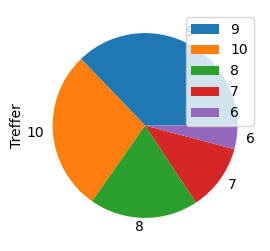

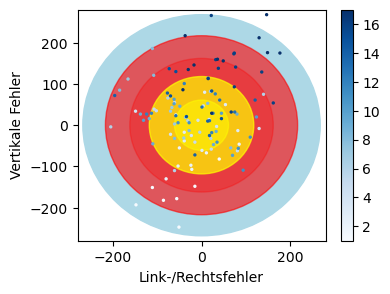

In [9]:
#Vergleich erster Datensatz
Ringe(arrows1)
Zielscheibe(arrows1)

<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>

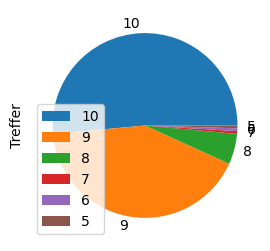

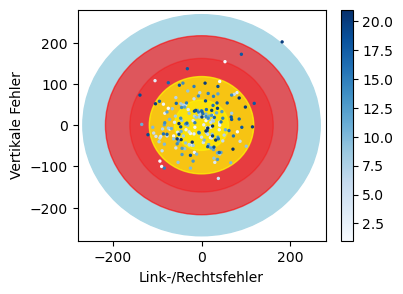

In [10]:
#Vergleich zweiter Datensatz
Ringe(arrows2)
Zielscheibe(arrows2)

<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>

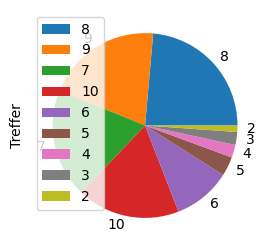

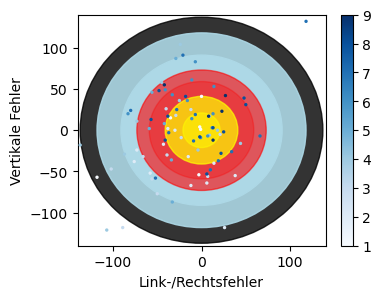

In [11]:
#Vergleich dritter Datensatz
Ringe(arrows3)
Zielscheibe(arrows3)

<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>

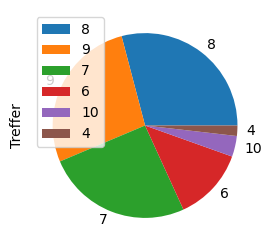

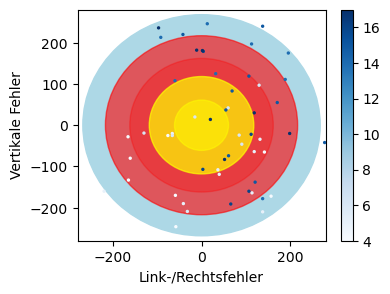

In [12]:
#Vergleich vierter Datensatz
Ringe(arrows4)
Zielscheibe(arrows4)

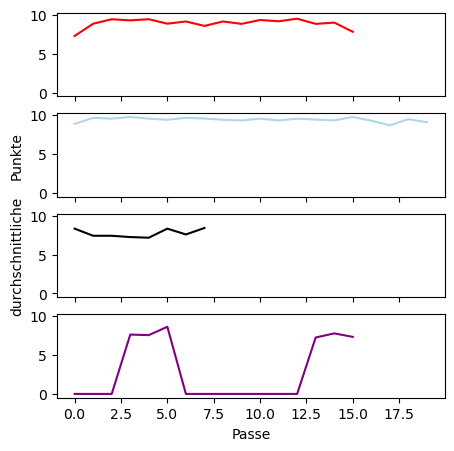

In [13]:
Trefferpassequote(AveragePunkteProPasse(arrows1),AveragePunkteProPasse(arrows2),AveragePunkteProPasse(arrows3),AveragePunkteProPasse(arrows4))

### &#11088; Interaktive Grafik

In [14]:
from ipywidgets import interact
import ipywidgets as widgets

In [15]:
def intgraf(Data, Passe):

    if Data == 1:
        data = Datensatz("arrows1.csv")
    elif Data == 2:
        data = Datensatz("arrows2.csv")
    elif Data == 3:
        data = Datensatz("arrows3.csv")
    else:
        data = Datensatz("arrows4.csv")

    data = data[data["Passe"] == Passe]

    if data["Typ Auflage"].max() == 122:
        plot = data.plot.scatter(x="x", y="y", figsize=(3, 3), s=2, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap="Blues", legend=True, xlim=(-280, 280), ylim=(-280, 280), zorder=6)

        c11 = plt.Circle((0, 0), 61, alpha=0.5, color='yellow', zorder=5)         # 10 Punkte
        c12 = plt.Circle((0, 0), 118, alpha=0.7, color='yellow', zorder=4)        # 9 Punkte
        c13 = plt.Circle((0, 0), 162, alpha=0.3, color='red', zorder=3)           # 8 Punkte
        c14 = plt.Circle((0, 0), 217, alpha=0.6, color='red', zorder=2)           # 7 Punkte
        c15 = plt.Circle((0, 0), 268, alpha=1.0, color='lightblue', zorder=1)     # 6 Punkte

        for l in [c11, c12, c13, c14, c15]:
            plot.add_patch(l)
        
    elif data["Typ Auflage"].max() == 40:
        plot = data.plot.scatter(x="x", y="y", figsize=(3, 3), s=2, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap="Blues", legend=True, xlim=(-140, 140), ylim=(-140, 140), zorder=8) 

        c31 = plt.Circle((0, 0), 21, alpha=0.5, color='yellow', zorder=7)     # 10 Punkte       
        c32 = plt.Circle((0, 0), 41, alpha=0.7, color='yellow', zorder=6)     # 9 Punkte
        c33 = plt.Circle((0, 0), 59, alpha=0.3, color='red', zorder=5)        # 8 Punkte
        c34 = plt.Circle((0, 0), 73, alpha=0.6, color='red', zorder=4)        # 7 Punkte
        c35 = plt.Circle((0, 0), 91, alpha=1.0, color='lightblue', zorder=3)  # 6 Punkte
        c36 = plt.Circle((0, 0), 118, alpha=0.9, color='lightblue', zorder=2) # 5 Punkte
        c37 = plt.Circle((0, 0), 137, alpha=0.8, color='black', zorder=1)     # 4 Punkte

        for l in [c31, c32, c33, c34, c35, c36, c37]:
            plot.add_patch(l)
        
    else:
        print("Der Datensatz erhält keine Standardwerte für Typauflage")
    return plot


interact(intgraf, Data=[1, 2, 3, 4], Passe=(1, 17, 1))


interactive(children=(Dropdown(description='Data', options=(1, 2, 3, 4), value=1), IntSlider(value=9, description='Passe', max=17, min=1), Output()), _dom_classes=('widget-interact',))

<function intgraf at 0x1810bb740>

### &#11088; Mittelwert & Standardabweichung

In [16]:
def berechneMittelwerte(Datensatz):
    xsum = 0
    for i in Datensatz["x"]:
        xsum = xsum + i
        xmw = xsum / len(Datensatz["x"])
  
    ysum = 0
    for i in Datensatz["y"]:
         ysum = ysum + i
         ymw = ysum / len(Datensatz["y"])

    return xmw, ymw


berechneMittelwerte(arrows1)

(-949/121, 3090/121)

In [17]:
def berechneStandardabweichung(Datensatz):
    xstd = Datensatz["x"].std()
    ystd = Datensatz["y"].std()

    return xstd, ystd

berechneStandardabweichung(arrows1)

(80.17626501075227, 93.37648181084947)

In [18]:
def Kennzahlen(Datensatz):
    if Datensatz["Typ Auflage"].max() == 122:
        plot = Datensatz.plot.scatter(x="x", y="y", figsize=(4,3), s=5, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap="Blues", legend=True, color= Datensatz["Passe"], xlim=(-280, 280), ylim=(-280, 280), zorder=6)

        c11 = plt.Circle((0, 0), 61, alpha=0.5, color='yellow', zorder=5)         # 10 Punkte
        c12 = plt.Circle((0, 0), 118, alpha=0.7, color='yellow', zorder=4)        # 9 Punkte
        c13 = plt.Circle((0, 0), 162, alpha=0.3, color='red', zorder=3)           # 8 Punkte
        c14 = plt.Circle((0, 0), 217, alpha=0.6, color='red', zorder=2)           # 7 Punkte
        c15 = plt.Circle((0, 0), 268, alpha=1.0, color='lightblue', zorder=1)     # 6 Punkte

        for l in [c11, c12, c13, c14, c15]:
            plot.add_patch(l)
        
        #Mittelwerte berechnen
        xmw, ymw = berechneMittelwerte(Datensatz)
        mwcircle = plt.Circle((xmw, ymw), 5, alpha = 0.9, color='blueviolet', zorder=8, label = "Mittelwerte")
        plot.add_patch(mwcircle)    

        #Standardabweichung berechnen
        xstd, ystd = berechneStandardabweichung(Datensatz)
        stdcircle = plt.Circle((xstd, ystd), 8, alpha = 0.9, color='green', zorder=8, label ="Streuungen")
        plot.add_patch(stdcircle)

        #Legende für Mittelwerte
        handles, labels = plot.get_legend_handles_labels()
        handles.append(mwcircle)
        plot.legend(handles, labels, loc = "upper right", fontsize=7)

        #Legende für Streuung
        handles, labels = plot.get_legend_handles_labels()
        handles.append(stdcircle)
        plot.legend(handles, labels, loc = "upper right", fontsize=7)



    elif Datensatz["Typ Auflage"].max() == 40:
        plot = Datensatz.plot.scatter(x="x", y="y", figsize=(4, 3), s=4, xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler', colormap="Blues", legend=True, color= Datensatz["Passe"], xlim=(-140, 140), ylim=(-140, 140), zorder=8) 

        c31 = plt.Circle((0, 0), 21, alpha=0.5, color='yellow', zorder=7)     # 10 Punkte       
        c32 = plt.Circle((0, 0), 41, alpha=0.7, color='yellow', zorder=6)     # 9 Punkte
        c33 = plt.Circle((0, 0), 59, alpha=0.3, color='red', zorder=5)        # 8 Punkte
        c34 = plt.Circle((0, 0), 73, alpha=0.6, color='red', zorder=4)        # 7 Punkte
        c35 = plt.Circle((0, 0), 91, alpha=1.0, color='lightblue', zorder=3)  # 6 Punkte
        c36 = plt.Circle((0, 0), 118, alpha=0.9, color='lightblue', zorder=2) # 5 Punkte
        c37 = plt.Circle((0, 0), 137, alpha=0.8, color='black', zorder=1)     # 4 Punkte

        for l in [c31, c32, c33, c34, c35, c36, c37]:
            plot.add_patch(l)
        
        #Mittelwerte berechnen
        xmw, ymw = berechneMittelwerte(Datensatz)
        mwcircle = plt.Circle((xmw, ymw), 3, alpha = 0.9, color='blueviolet', zorder=8, label = "Mittelwerte")
        plot.add_patch(mwcircle)

        #Standardabweichung berechnen
        xstd, ystd = berechneStandardabweichung(Datensatz)
        stdcircle = plt.Circle((xstd, ystd), 8, alpha = 0.9, color='navy', zorder=8, label ="Streuungen")
        plot.add_patch(stdcircle)

        #Legende für Mittelwerte
        handles, labels = plot.get_legend_handles_labels()
        handles.append(mwcircle)
        plot.legend(handles, labels, loc = "upper right", fontsize=7)

        #Legende für Streuung
        handles, labels = plot.get_legend_handles_labels()
        handles.append(stdcircle)
        plot.legend(handles, labels, loc = "upper right", fontsize=7)
        

    else:
        print("Der Datensatz erhält keine Standardwerte für Typauflage")


    return plot, mwcircle, stdcircle


(<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>,
 <matplotlib.patches.Circle object at 0x18127c810>)

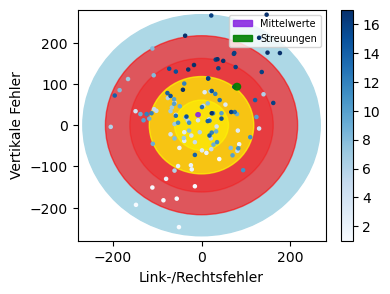

In [19]:
#Mittelwerte und Streuung erster Datensatz
Kennzahlen(arrows1)

(<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>,
 <matplotlib.patches.Circle object at 0x18118be50>)

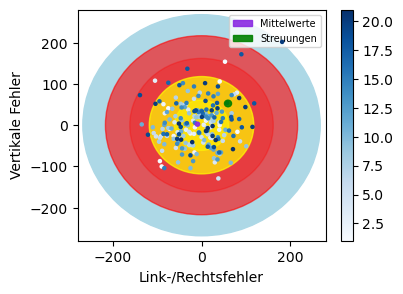

In [20]:
#Mittelwerte und Streuung zweiter Datensatz
Kennzahlen(arrows2)

(<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>,
 <matplotlib.patches.Circle object at 0x18122f910>)

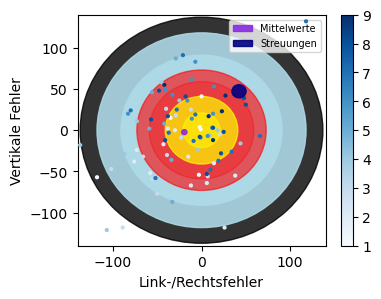

In [21]:
#Mittelwerte und Streuung dritter Datensatz
Kennzahlen(arrows3)

(<Axes: xlabel='Link-/Rechtsfehler', ylabel='Vertikale Fehler'>,
 <matplotlib.patches.Circle object at 0x1812a7910>)

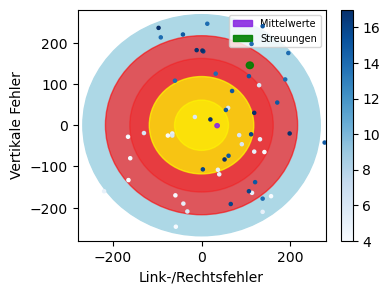

In [22]:
#Mittelwerte und Streuung vierter Datensatz
Kennzahlen(arrows4)

### &#11088; Fehlerellipse

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms


In [42]:
def var(datensatz, variable):
    mittelwert = datensatz[variable].mean()

    sum = 0
    liste = []

    for i in datensatz[variable]:
        liste.append((i - mittelwert)**2)
    for i in liste:
        sum = sum + i


    varianz = (1/(datensatz[variable].count()-1))*sum

    return varianz

def covarianz (datensatz, variable, variable2):
    datensatzmenge = datensatz[variable].count()

    mittelwert1 = datensatz[variable].mean()
    mittelwert2 = datensatz[variable2].mean()

    sum1 = datensatz[variable]-mittelwert1
    sum2 = datensatz[variable2]-mittelwert2

    multi = sum1*sum2

    sum = 0 
    for l in multi:
        sum = sum + l

    covarianz = (1/(datensatzmenge-1))*sum

    return covarianz

def Covarianzmatrix (var1, var2, covarianz):
    A = Matrix([[var1, covarianz],
                [covarianz, var2]])
    return A

def width(Covarianzmatrix):
    eigenvalues, eigenvectores= np.linalg.eig(Covarianzmatrix)
    width = 2 * np.sqrt(eigenvalues[0])*2.447746830680816
    height = 2 * np.sqrt(eigenvalues[1])*2.447746830680816

    return width

def height(Covarianzmatrix):
    eigenvalues, eigenvectores= np.linalg.eig(Covarianzmatrix)
    width = 2 * np.sqrt(eigenvalues[0])*2.447746830680816
    height = 2 * np.sqrt(eigenvalues[1])*2.447746830680816

    return height

def Winkel(Covarianzmatrix):

    eigenvalues, eigenvectors = np.linalg.eig(Covarianzmatrix)
    
    max_eigenvalue_index = np.argmax(eigenvalues)
    
    max_eigenvector = eigenvectors[:, max_eigenvalue_index]
    
    alpha = np.arctan2(max_eigenvector[1], max_eigenvector[0])
    
    alpha_degrees = np.degrees(alpha)
    
    return alpha_degrees

def ploterror(data, width, height, angle):

    if data["Typ Auflage"].max() == 122:

        ellipse = Ellipse(xy=(berechneMittelwerte(data)), width=width, height=height, angle=angle, edgecolor = 'green',fc= 'black',lw=1, alpha=0.4, zorder= 7)
        fig, ax = plt.subplots(figsize = (4,4))
        ax.scatter(x = data["x"], y = data["y"], s = 2, zorder = 6)
        ax.add_patch(ellipse)
        ax.set_xlim(-280,280)
        ax.set_ylim(-280,280)

        c11 = plt.Circle((0, 0), 61, alpha=0.5, color='yellow', zorder=5)         # 10 Punkte
        c12 = plt.Circle((0, 0), 118, alpha=0.7, color='yellow', zorder=4)        # 9 Punkte
        c13 = plt.Circle((0, 0), 162, alpha=0.3, color='red', zorder=3)           # 8 Punkte
        c14 = plt.Circle((0, 0), 217, alpha=0.6, color='red', zorder=2)           # 7 Punkte
        c15 = plt.Circle((0, 0), 268, alpha=1.0, color='lightblue', zorder=1)     # 6 Punkte

        for l in [c11, c12, c13, c14, c15]:
            ax.add_patch(l)

        plt.show()
    else: 
        ellipse = Ellipse(xy=(berechneMittelwerte(data)), width=width, height=height, angle=angle, edgecolor = 'green',fc = 'black',lw=1, alpha= 0.4,zorder = 9)
        fig, ax = plt.subplots(figsize = (4,4))
        ax.scatter(x = data["x"], y = data["y"], s = 2, zorder =8)
        ax.add_patch(ellipse)
        ax.set_xlim(-140,140)
        ax.set_ylim(-140,140)
        c31 = plt.Circle((0, 0), 21, alpha=0.5, color='yellow', zorder=7)     # 10 Punkte       
        c32 = plt.Circle((0, 0), 41, alpha=0.7, color='yellow', zorder=6)     # 9 Punkte
        c33 = plt.Circle((0, 0), 59, alpha=0.3, color='red', zorder=5)        # 8 Punkte
        c34 = plt.Circle((0, 0), 73, alpha=0.6, color='red', zorder=4)        # 7 Punkte
        c35 = plt.Circle((0, 0), 91, alpha=1.0, color='lightblue', zorder=3)  # 6 Punkte
        c36 = plt.Circle((0, 0), 118, alpha=0.9, color='lightblue', zorder=2) # 5 Punkte
        c37 = plt.Circle((0, 0), 137, alpha=0.8, color='black', zorder=1)     # 4 Punkte

        for l in [c31, c32, c33, c34, c35, c36, c37]:
            ax.add_patch(l)
        plt.show()
    



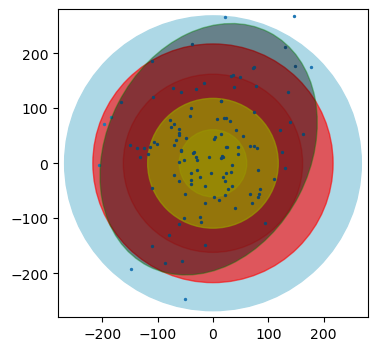

In [43]:
height1 = height(Covarianzmatrix(var(arrows1, "x"), var(arrows1,"y"), covarianz(arrows1, "x", "y")))
width1 = width(Covarianzmatrix(var(arrows1, "x"), var(arrows1,"y"), covarianz(arrows1, "x", "y")))
angle1 = Winkel(Covarianzmatrix(var(arrows1, "x"), var(arrows1,"y"), covarianz(arrows1, "x", "y")))

ploterror(arrows1, height1, width1, angle1)

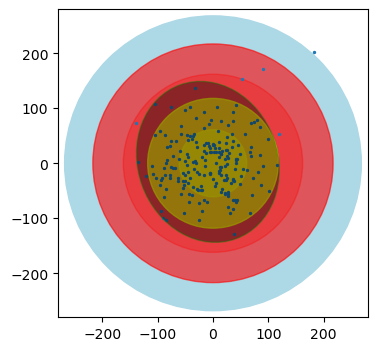

In [44]:
height2 = height(Covarianzmatrix(var(arrows2, "x"), var(arrows2,"y"), covarianz(arrows2, "x", "y")))
width2 = width(Covarianzmatrix(var(arrows2, "x"), var(arrows2,"y"), covarianz(arrows2, "x", "y")))
angle2 = Winkel(Covarianzmatrix(var(arrows2, "x"), var(arrows2,"y"), covarianz(arrows2, "x", "y")))

ploterror(arrows2, height2, width2, angle2)

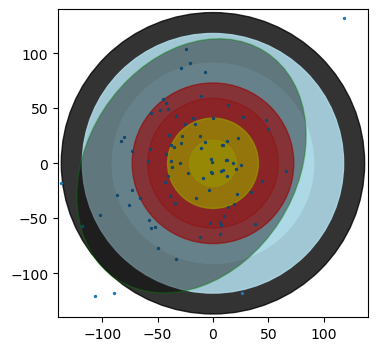

In [45]:
height3 = height(Covarianzmatrix(var(arrows3, "x"), var(arrows3,"y"), covarianz(arrows3, "x", "y")))
width3 = width(Covarianzmatrix(var(arrows3, "x"), var(arrows3,"y"), covarianz(arrows3, "x", "y")))
angle3 = Winkel(Covarianzmatrix(var(arrows3, "x"), var(arrows3,"y"), covarianz(arrows3, "x", "y")))

ploterror(arrows3, height3, width3, angle3)

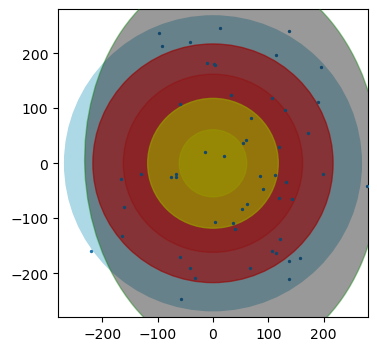

In [46]:
height4 = height(Covarianzmatrix(var(arrows4, "x"), var(arrows4,"y"), covarianz(arrows4, "x", "y")))
width4 = width(Covarianzmatrix(var(arrows4, "x"), var(arrows4,"y"), covarianz(arrows4, "x", "y")))
angle4 = Winkel(Covarianzmatrix(var(arrows4, "x"), var(arrows4,"y"), covarianz(arrows4, "x", "y")))

ploterror(arrows4, height4, width4, angle4)

### &#11088; Winkelstreuung

In [29]:
import math

def berechneWinkelstreuung(Datensatz):

    #Distanz ermiteln zwischen den Mittelwerten und der Streuungen
    xa, ya = berechneMittelwerte(Datensatz)
    xb, yb = berechneStandardabweichung(Datensatz)

    py = math.sqrt(xb**2 + yb**2)


    #Winkelberechnung
    if Datensatz["Distanz"].max() == 70:
        a = arctan(py/70000)*180/math.pi
        return a
    
    elif Datensatz ["Distanz"].max() == 18:
        a = (arctan(py/18000))*180/math.pi
        return a


In [30]:
#Winkelstreuung des ersten Datensatzes
berechneWinkelstreuung(arrows1)

0.10073797202790283

In [31]:
#Winkelstreuung des zweiten Datensatzes
berechneWinkelstreuung(arrows2)

0.06522573917410622

In [32]:
#Winkelstreuung des dritten Datensatzes
berechneWinkelstreuung(arrows3)

0.20178430488553695

In [33]:
#Winkelstreuung des vierten Datensatzes
berechneWinkelstreuung(arrows4)

0.14869009411832476

### &#11088; Sinnvolle Zusammenfassung